# Random Forest Classifier using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm Random Forest as a Classifier algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

Fingerprint ID  coordinate_X  coordinate_Y      zone  f0:5c:19:94:1a:40  \
0               265           1.0           3.0  Personal              -62.0   
1               266           1.0           3.0  Personal              -62.0   
2               267           1.0           3.0  Personal              -63.0   
3               268           1.0           3.0  Personal              -63.0   
4               269           1.0           3.0  Personal              -63.0   
..              ...           ...           ...       ...                ...   
745            1022           2.0           3.0  Personal                NaN   
746            1023           2.0           3.0  Personal                NaN   
747            1024           2.0           3.0  Personal                NaN   
748            1025           2.0           3.0  Personal                NaN   
749            1026           2.0           3.0  Personal                NaN   

     f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  34:fc:b9:18:e4:c1  \
0                -65.0              -63.0              -76.0   
1                -61.0              -62.0              -77.0   
2                -62.0              -62.0                NaN   
3                -61.0              -63.0                NaN   
4                -61.0              -63.0              -76.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  ...  10:7b:44:eb:73:98  \
0                -78.0              -79.0  ...                NaN   
1                -78.0              -78.0  ...                NaN   
2                  NaN                NaN  ...                NaN   
3                  NaN                NaN  ...                NaN   
4                -78.0              -78.0  ...                NaN   
..                 ...                ...  ...                ...   
745                NaN                NaN  ...                NaN   
746                NaN                NaN  ...                NaN   
747                NaN                NaN  ...                NaN   
748                NaN                NaN  ...                NaN   
749                NaN                NaN  ...                NaN   

     f0:5c:19:94:19:f2  f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745              -90.0              -89.0                NaN   
746              -88.0                NaN                NaN   
747              -89.0              -90.0                NaN   
748              -91.0              -89.0                NaN   
749              -91.0              -92.0                NaN   

     34:fc:b9:18:e7:22  34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745                NaN                NaN              -90.0   
746                NaN                NaN              -90.0   
747                NaN                NaN              -90.0   
748                NaN               

(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

count        mean         std    min     25%    50%  \
Fingerprint ID     750.0  639.980000  217.460567  265.0  452.25  639.5   
coordinate_X       750.0    0.000000    1.415157   -2.0   -1.00    0.0   
coordinate_Y       750.0    1.000000    1.415157   -1.0    0.00    1.0   
f0:5c:19:94:1a:40  630.0  -65.284127    3.983300  -76.0  -68.00  -65.0   
f0:5c:19:94:1a:41  634.0  -63.529968    3.464086  -71.0  -66.00  -64.0   
f0:5c:19:94:1a:42  635.0  -64.628346    3.965205  -76.0  -68.00  -64.0   
34:fc:b9:18:e4:c1  189.0  -78.380952    3.702049  -86.0  -81.00  -78.0   
34:fc:b9:18:e4:c0  145.0  -80.255172    4.808527  -92.0  -84.00  -79.0   
34:fc:b9:18:e4:c2  178.0  -81.410112    4.828740  -92.0  -86.00  -81.0   
f0:5c:19:94:1a:50  664.0  -78.664157    3.975435  -89.0  -81.25  -79.0   
f0:5c:19:94:1a:51  699.0  -79.021459    4.066545  -87.0  -82.00  -80.0   
f0:5c:19:94:1a:52  738.0  -79.521680    4.434378  -90.0  -82.00  -80.0   
4c:ed:fb:5a:5c:0c  712.0  -89.289326    3.266072  -96.0  -91.25  -90.0   
4c:ed:fb:5a:5c:08  682.0  -80.931085    4.109686  -96.0  -83.00  -81.0   
f0:5c:19:94:19:e1  343.0  -85.886297    2.726610  -91.0  -88.00  -86.0   
f0:5c:19:94:19:e2  280.0  -87.542857    2.552310  -93.0  -89.00  -88.0   
34:fc:b9:18:e8:21  239.0  -75.732218    3.742141  -86.0  -78.00  -75.0   
34:fc:b9:18:e8:22  228.0  -79.763158    4.600905  -93.0  -83.00  -79.0   
34:fc:b9:18:e8:20  222.0  -79.364865    4.135404  -94.0  -82.00  -78.0   
f0:5c:19:94:19:e0  189.0  -87.354497    2.763024  -93.0  -89.00  -88.0   
34:fc:b9:18:e4:d2  426.0  -86.833333    3.072905  -92.0  -89.00  -87.0   
48:ee:0c:ed:93:b5  492.0  -92.573171    1.760835  -98.0  -94.00  -93.0   
34:fc:b9:18:e4:d0  354.0  -86.290960    3.053364  -92.0  -88.00  -87.0   
34:fc:b9:18:e4:d1   85.0  -82.094118    2.684273  -87.0  -84.00  -81.0   
34:fc:b9:18:e8:30   71.0  -87.197183    1.141674  -90.0  -88.00  -87.0   
34:fc:b9:18:e8:32  105.0  -87.933333    1.442931  -91.0  -89.00  -88.0   
10:7b:44:eb:73:98    1.0  -94.000000         NaN  -94.0  -94.00  -94.0   
f0:5c:19:94:19:f2   66.0  -92.106061    2.560822  -96.0  -94.00  -93.0   
f0:5c:19:94:19:f0   27.0  -90.703704    1.996436  -95.0  -91.50  -90.0   
34:fc:b9:18:e7:21   20.0  -87.000000    2.152110  -90.0  -89.00  -87.5   
34:fc:b9:18:e7:22   10.0  -88.700000    2.311805  -91.0  -90.00  -89.5   
34:fc:b9:18:e7:20   17.0  -88.941176    2.164214  -92.0  -91.00  -90.0   
f0:5c:19:94:19:f1   25.0  -89.440000    0.820569  -91.0  -90.00  -90.0   
E1:E9:C3:D9:09:C3  742.0  -85.357143    7.520764 -101.0  -90.00  -86.5   
FF:20:88:3C:97:E7  550.0  -82.776364    7.793965  -97.0  -88.00  -84.0   
CA:E0:7D:11:26:B3  750.0  -85.388000    8.292073 -100.0  -92.00  -86.0   

                      75%     max  
Fingerprint ID     826.75  1026.0  
coordinate_X         1.00     2.0  
coordinate_Y         2.00     3.0  
f0:5c:19:94:1a:40  -62.00   -56.0  
f0:5c:19:94:1a:41  -62.00   -48.0  
f0:5c:19:94:1a:42  -61.00   -56.0  
34:fc:b9:18:e4:c1  -76.00   -70.0  
34:fc:b9:18:e4:c0  -77.00   -71.0  
34:fc:b9:18:e4:c2  -78.00   -70.0  
f0:5c:19:94:1a:50  -76.00   -69.0  
f0:5c:19:94:1a:51  -76.00   -69.0  
f0:5c:19:94:1a:52  -77.00   -69.0  
4c:ed:fb:5a:5c:0c  -88.00   -81.0  
4c:ed:fb:5a:5c:08  -78.00   -71.0  
f0:5c:19:94:19:e1  -84.00   -76.0  
f0:5c:19:94:19:e2  -86.00   -78.0  
34:fc:b9:18:e8:21  -73.00   -69.0  
34:fc:b9:18:e8:22  -77.00   -70.0  
34:fc:b9:18:e8:20  -77.00   -71.0  
f0:5c:19:94:19:e0  -85.00   -79.0  
34:fc:b9:18:e4:d2  -86.00   -77.0  
48:ee:0c:ed:93:b5  -91.00   -88.0  
34:fc:b9:18:e4:d0  -85.00   -77.0  
34:fc:b9:18:e4:d1  -80.00   -77.0  
34:fc:b9:18:e8:30  -86.00   -85.0  
34:fc:b9:18:e8:32  -87.00   -85.0  
10:7b:44:eb:73:98  -94.00   -94.0  
f0:5c:19:94:19:f2  -90.00   -88.0  
f0:5c:19:94:19:f0  -89.00   -88.0  
34:fc:b9:18:e7:21  -85.75   -82.0  
34:fc:b9:18:e7:22  -87.50   -84.0  
34:fc:b9:18:e7:20  -87.00   -85.0  
f0:5c:19:94:19:f1  -89.00   -88.0  
E1:E9:C3:D9:09:C3  -83.00   -61.0  
FF:20:88:3C:97:E7  -

### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [8]:
missing_dataset = compute_missing_values(dataset)

Missing Values  Samples  % of Missing Values
Fingerprint ID                  0      750             0.000000
coordinate_X                    0      750             0.000000
coordinate_Y                    0      750             0.000000
zone                            0      750             0.000000
f0:5c:19:94:1a:40             120      750             0.160000
f0:5c:19:94:1a:41             116      750             0.154667
f0:5c:19:94:1a:42             115      750             0.153333
34:fc:b9:18:e4:c1             561      750             0.748000
34:fc:b9:18:e4:c0             605      750             0.806667
34:fc:b9:18:e4:c2             572      750             0.762667
f0:5c:19:94:1a:50              86      750             0.114667
f0:5c:19:94:1a:51              51      750             0.068000
f0:5c:19:94:1a:52              12      750             0.016000
4c:ed:fb:5a:5c:0c              38      750             0.050667
4c:ed:fb:5a:5c:08              68      750             0.090667
f0:5c:19:94:19:e1             407      750             0.542667
f0:5c:19:94:19:e2             470      750             0.626667
34:fc:b9:18:e8:21             511      750             0.681333
34:fc:b9:18:e8:22             522      750             0.696000
34:fc:b9:18:e8:20             528      750             0.704000
f0:5c:19:94:19:e0             561      750             0.748000
34:fc:b9:18:e4:d2             324      750             0.432000
48:ee:0c:ed:93:b5             258      750             0.344000
34:fc:b9:18:e4:d0             396      750             0.528000
34:fc:b9:18:e4:d1             665      750             0.886667
34:fc:b9:18:e8:30             679      750             0.905333
34:fc:b9:18:e8:32             645      750             0.860000
10:7b:44:eb:73:98             749      750             0.998667
f0:5c:19:94:19:f2             684      750             0.912000
f0:5c:19:94:19:f0             723      750             0.964000
34:fc:b9:18:e7:21             730      750             0.973333
34:fc:b9:18:e7:22             740      750             0.986667
34:fc:b9:18:e7:20             733      750             0.977333
f0:5c:19:94:19:f1             725      750             0.966667
E1:E9:C3:D9:09:C3               8      750             0.010667
FF:20:88:3C:97:E7             200      750             0.266667
CA:E0:7D:11:26:B3               0      750             0.000000

### Overall Histogram of dataset atributes

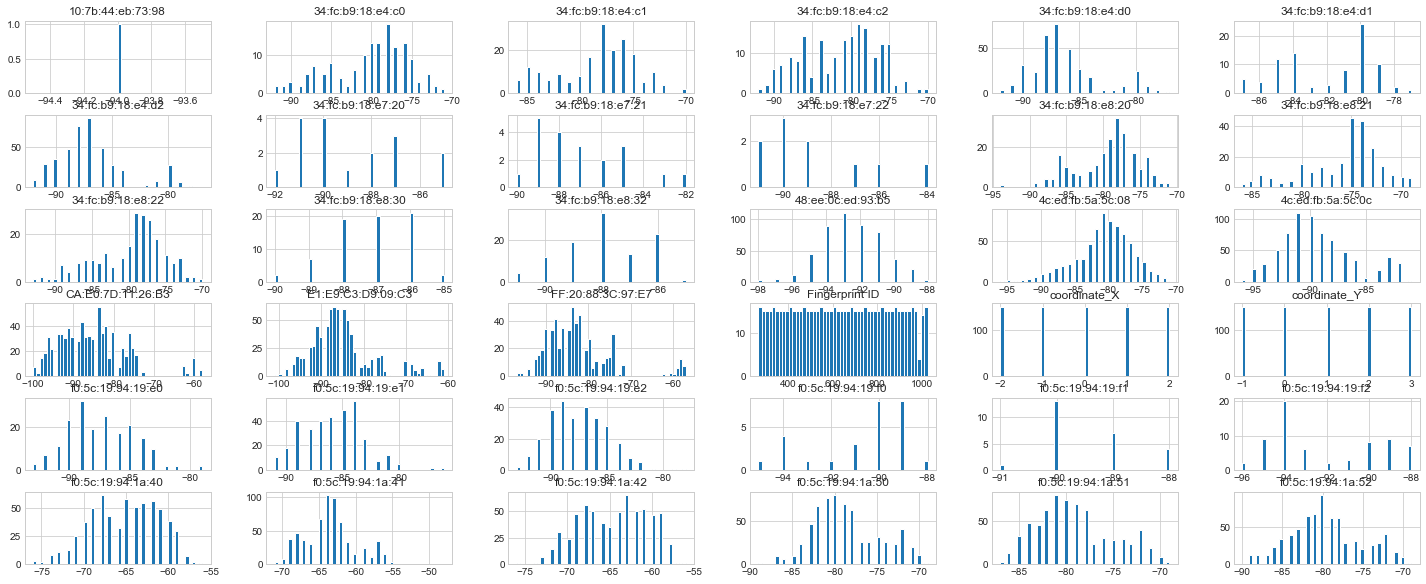

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

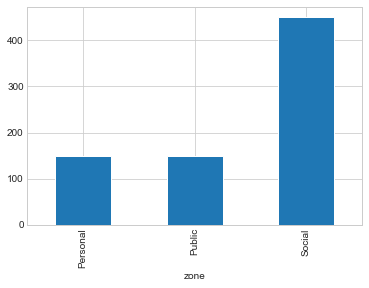

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0                -62.0              -65.0              -63.0   
1                -62.0              -61.0              -62.0   
2                -63.0              -62.0              -62.0   
3                -63.0              -61.0              -63.0   
4                -63.0              -61.0              -63.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0                -76.0              -78.0              -79.0   
1                -77.0              -78.0              -78.0   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                -76.0              -78.0              -78.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  34:fc:b9:18:e4:d1  34:fc:b9:18:e8:30  \
0                -89.0  ...                NaN                NaN   
1                -90.0  ...                NaN                NaN   
2                -90.0  ...                NaN                NaN   
3                -90.0  ...                NaN                NaN   
4                -90.0  ...                NaN                NaN   
..                 ...  ...                ...                ...   
745              -83.0  ...                NaN                NaN   
746              -83.0  ...              -86.0                NaN   
747              -83.0  ...                NaN                NaN   
748              -83.0  ...              -85.0                NaN   
749              -83.0  ...                NaN                NaN   

     34:fc:b9:18:e8:32  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745                NaN                NaN              -90.0   
746                NaN                NaN              -88.0   
747                NaN                NaN              -89.0   
748                NaN                NaN              -91.0   
749                NaN                NaN              -91.0   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0                  NaN              

<BarContainer object of 30 artists>

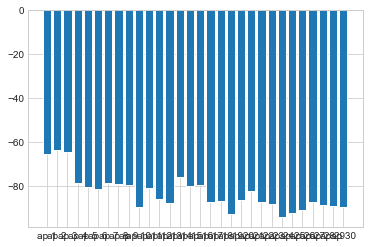

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

E1:E9:C3:D9:09:C3  FF:20:88:3C:97:E7  CA:E0:7D:11:26:B3
0                -86.0              -88.0                -96
1                -96.0              -88.0                -96
2                -94.0              -92.0                -98
3                -92.0              -89.0                -96
4                -96.0              -89.0                -93
..                 ...                ...                ...
745              -95.0              -84.0                -95
746              -94.0              -83.0                -92
747              -92.0              -84.0                -91
748              -93.0              -84.0                -93
749              -97.0              -82.0                -93

[750 rows x 3 columns]

<BarContainer object of 3 artists>

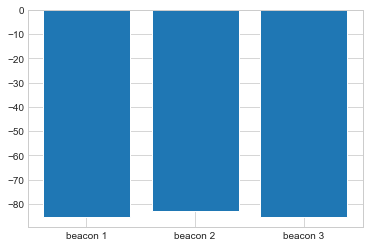

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

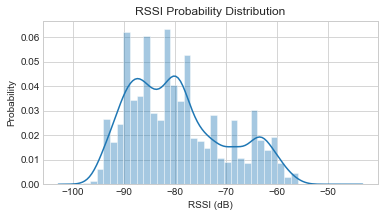

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

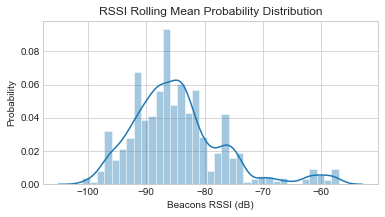

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

Fingerprint ID  coordinate_X  coordinate_Y  \
Fingerprint ID           1.000000      0.366251     -0.566946   
coordinate_X             0.366251      1.000000      0.000000   
coordinate_Y            -0.566946      0.000000      1.000000   
f0:5c:19:94:1a:40        0.032462      0.280135      0.053322   
f0:5c:19:94:1a:41        0.242338      0.416280     -0.071948   
f0:5c:19:94:1a:42        0.033822      0.287384      0.053766   
34:fc:b9:18:e4:c1       -0.139389      0.064912      0.137335   
34:fc:b9:18:e4:c0       -0.117810      0.171978      0.016277   
34:fc:b9:18:e4:c2       -0.001366      0.200114     -0.044580   
f0:5c:19:94:1a:50        0.508888      0.225635     -0.062025   
f0:5c:19:94:1a:51        0.396653      0.154204      0.016996   
f0:5c:19:94:1a:52        0.410779      0.175353     -0.006813   
4c:ed:fb:5a:5c:0c        0.387284      0.138658     -0.002532   
4c:ed:fb:5a:5c:08       -0.125609      0.083452      0.162620   
f0:5c:19:94:19:e1        0.225679      0.180819     -0.071232   
f0:5c:19:94:19:e2        0.258287      0.324229     -0.203365   
34:fc:b9:18:e8:21        0.095567     -0.436132     -0.045630   
34:fc:b9:18:e8:22       -0.184106     -0.325715      0.137012   
34:fc:b9:18:e8:20       -0.151016     -0.324171      0.126985   
f0:5c:19:94:19:e0        0.289709      0.255014     -0.267063   
34:fc:b9:18:e4:d2       -0.039181     -0.125951      0.157013   
48:ee:0c:ed:93:b5        0.102343      0.089620     -0.081692   
34:fc:b9:18:e4:d0       -0.214649     -0.117911      0.298540   
34:fc:b9:18:e4:d1       -0.641835     -0.577593     -0.093789   
34:fc:b9:18:e8:30       -0.434754     -0.307743      0.547200   
34:fc:b9:18:e8:32       -0.169819     -0.353095      0.298193   
10:7b:44:eb:73:98             NaN           NaN           NaN   
f0:5c:19:94:19:f2        0.748611           NaN      0.832861   
f0:5c:19:94:19:f0        0.837234           NaN      0.857329   
34:fc:b9:18:e7:21       -0.071316     -0.623570     -0.333712   
34:fc:b9:18:e7:22       -0.227020     -0.854697     -0.592749   
34:fc:b9:18:e7:20       -0.675707     -0.919701     -0.812240   
f0:5c:19:94:19:f1       -0.133456           NaN           NaN   
E1:E9:C3:D9:09:C3        0.109751     -0.558757     -0.425166   
FF:20:88:3C:97:E7       -0.202906     -0.413933      0.318924   
CA:E0:7D:11:26:B3        0.301147      0.148591     -0.666386   

                   f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
Fingerprint ID              0.032462           0.242338           0.033822   
coordinate_X                0.280135           0.416280           0.287384   
coordinate_Y                0.053322          -0.071948           0.053766   
f0:5c:19:94:1a:40           1.000000           0.588375           0.899034   
f0:5c:19:94:1a:41           0.588375           1.000000           0.617635   
f0:5c:19:94:1a:42           0.899034           0.617635           1.000000   
34:fc:b9:18:e4:c1          -0.118245           0.056372          -0.096208   
34:fc:b9:18:e4:c0          -0.239832          -0.085792          -0.213136   
34:fc:b9:18:e4:c2          -0.170579           0.000745          -0.180547   
f0:5c:19:94:1a:50           0.047614           0.185243           0.080835   
f0:5c:19:94:1a:51           0.041851           0.169981           0.076604   
f0:5c:19:94:1a:52           0.014849           0.206879           0.048076   
4c:ed:fb:5a:5c:0c           0.256296           0.305813           0.265746   
4c:ed:fb:5a:5c:08           0.048229          -0.075076           0.058237   
f0:5c:19:94:19:e1           0.109968           0.372364           0.165445   
f0:5c:19:94:19:e2           0.185223           0.354054           0.249712   
34:fc:b9:18:e8:21          -0.119467           0.091196          -0.072939   
34:fc:b9:18:e8:22          -0.167929          -0.060037          -0.104376   
34:fc:b9:18:e8:20          -0.078970          -0.048271          -0.006674   
f0:5c:19:94:19:e0           0.133278           0.2244

### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [17]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
def compute_data_cleaning_with_global_minimum(dataset):
    numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,first_beacon_index:] = dataset.iloc[:,first_beacon_index:].fillna(nan_filler_ble)
    dataset.iloc[:,4:first_beacon_index] = dataset.iloc[:,4:first_beacon_index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [19]:
compute_data_cleaning_with_global_minimum(dataset)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


Fingerprint ID  coordinate_X  coordinate_Y      zone  f0:5c:19:94:1a:40  \
0               265           1.0           3.0  Personal             -62.00   
1               266           1.0           3.0  Personal             -62.00   
2               267           1.0           3.0  Personal             -63.00   
3               268           1.0           3.0  Personal             -63.00   
4               269           1.0           3.0  Personal             -63.00   
..              ...           ...           ...       ...                ...   
745            1022           2.0           3.0  Personal             -98.98   
746            1023           2.0           3.0  Personal             -98.98   
747            1024           2.0           3.0  Personal             -98.98   
748            1025           2.0           3.0  Personal             -98.98   
749            1026           2.0           3.0  Personal             -98.98   

     f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  34:fc:b9:18:e4:c1  \
0               -65.00             -63.00             -76.00   
1               -61.00             -62.00             -77.00   
2               -62.00             -62.00             -98.98   
3               -61.00             -63.00             -98.98   
4               -61.00             -63.00             -76.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  ...  10:7b:44:eb:73:98  \
0               -78.00             -79.00  ...             -98.98   
1               -78.00             -78.00  ...             -98.98   
2               -98.98             -98.98  ...             -98.98   
3               -98.98             -98.98  ...             -98.98   
4               -78.00             -78.00  ...             -98.98   
..                 ...                ...  ...                ...   
745             -98.98             -98.98  ...             -98.98   
746             -98.98             -98.98  ...             -98.98   
747             -98.98             -98.98  ...             -98.98   
748             -98.98             -98.98  ...             -98.98   
749             -98.98             -98.98  ...             -98.98   

     f0:5c:19:94:19:f2  f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -90.00             -89.00             -98.98   
746             -88.00             -98.98             -98.98   
747             -89.00             -90.00             -98.98   
748             -91.00             -89.00             -98.98   
749             -91.00             -92.00             -98.98   

     34:fc:b9:18:e7:22  34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -98.98             -98.98             -90.00   
746             -98.98             -98.98             -90.00   
747             -98.98             -98.98             -90.00   
748             -98.98             -9

### Initialize Training Data
Training Data intialization for predictions purposes

In [20]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0               -62.00             -65.00             -63.00   
1               -62.00             -61.00             -62.00   
2               -63.00             -62.00             -62.00   
3               -63.00             -61.00             -63.00   
4               -63.00             -61.00             -63.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0               -76.00             -78.00             -79.00   
1               -77.00             -78.00             -78.00   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -76.00             -78.00             -78.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  34:fc:b9:18:e4:d1  34:fc:b9:18:e8:30  \
0                -89.0  ...             -98.98             -98.98   
1                -90.0  ...             -98.98             -98.98   
2                -90.0  ...             -98.98             -98.98   
3                -90.0  ...             -98.98             -98.98   
4                -90.0  ...             -98.98             -98.98   
..                 ...  ...                ...                ...   
745              -83.0  ...             -98.98             -98.98   
746              -83.0  ...             -86.00             -98.98   
747              -83.0  ...             -98.98             -98.98   
748              -83.0  ...             -85.00             -98.98   
749              -83.0  ...             -98.98             -98.98   

     34:fc:b9:18:e8:32  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -98.98             -98.98             -90.00   
746             -98.98             -98.98             -88.00   
747             -98.98             -98.98             -89.00   
748             -98.98             -98.98             -91.00   
749             -98.98             -98.98             -91.00   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0               -98.98             -

(750, 30)

In [21]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

E1:E9:C3:D9:09:C3  FF:20:88:3C:97:E7  CA:E0:7D:11:26:B3
0                -86.0              -88.0                -96
1                -96.0              -88.0                -96
2                -94.0              -92.0                -98
3                -92.0              -89.0                -96
4                -96.0              -89.0                -93
..                 ...                ...                ...
745              -95.0              -84.0                -95
746              -94.0              -83.0                -92
747              -92.0              -84.0                -91
748              -93.0              -84.0                -93
749              -97.0              -82.0                -93

[750 rows x 3 columns]

(750, 3)

In [22]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0               -62.00             -65.00             -63.00   
1               -62.00             -61.00             -62.00   
2               -63.00             -62.00             -62.00   
3               -63.00             -61.00             -63.00   
4               -63.00             -61.00             -63.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0               -76.00             -78.00             -79.00   
1               -77.00             -78.00             -78.00   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -76.00             -78.00             -78.00   
..                 ...                ...                ...   
745             -98.98             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -98.98             -98.98             -98.98   
748             -98.98             -98.98             -98.98   
749             -98.98             -98.98             -98.98   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0                -89.0  ...             -98.98             -98.98   
1                -90.0  ...             -98.98             -98.98   
2                -90.0  ...             -98.98             -98.98   
3                -90.0  ...             -98.98             -98.98   
4                -90.0  ...             -98.98             -98.98   
..                 ...  ...                ...                ...   
745              -83.0  ...             -98.98             -90.00   
746              -83.0  ...             -98.98             -88.00   
747              -83.0  ...             -98.98             -89.00   
748              -83.0  ...             -98.98             -91.00   
749              -83.0  ...             -98.98             -91.00   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0               -98.98             -98.98             -98.98   
1               -98.98             -98.98             -98.98   
2               -98.98             -98.98             -98.98   
3               -98.98             -98.98             -98.98   
4               -98.98             -98.98             -98.98   
..                 ...                ...                ...   
745             -89.00             -98.98             -98.98   
746             -98.98             -98.98             -98.98   
747             -90.00             -98.98             -98.98   
748             -89.00             -98.98             -98.98   
749             -92.00             -98.98             -98.98   

     34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  E1:E9:C3:D9:09:C3  \
0               -98.98             -

(750, 33)

### Plot Training Data
Graphical Display of the observations in the dataset

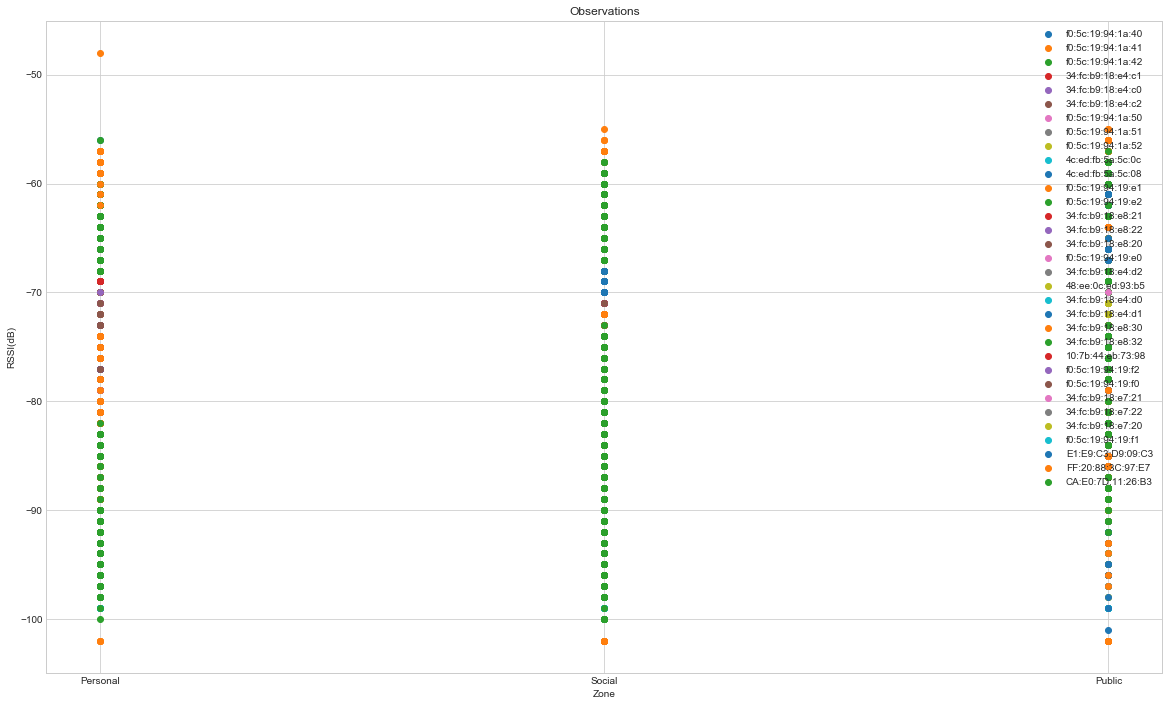

In [23]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [24]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [25]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


zone
0    Personal
1    Personal
2    Personal
3    Personal
4    Personal
..        ...
745  Personal
746  Personal
747  Personal
748  Personal
749  Personal

[750 rows x 1 columns]

After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [26]:
rf_basic = RandomForestClassifier()
print("DEFAULT HYPERPARAMETERS")
default_params = rf_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 
#Preprocessing options
scaler = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),None]
# Number of trees in random forest
initial_linespace = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
n_estimators = [10,100] + initial_linespace
# Criterion to consider at every split
criterion_metric = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__criterion': criterion_metric,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

DEFAULT HYPERPARAMETERS


bootstrap  ccp_alpha class_weight criterion max_depth max_features  \
1       True        0.0         None      gini      None         auto   

  max_leaf_nodes max_samples  min_impurity_decrease min_impurity_split  \
1           None        None                    0.0               None   

   min_samples_leaf  min_samples_split  min_weight_fraction_leaf  \
1                 1                  2                       0.0   

   n_estimators n_jobs  oob_score random_state  verbose  warm_start  
1           100   None      False         None        0       False

{'rf__n_estimators': [10, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__criterion': ['gini', 'entropy'], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}


### Statistics Output Format
Structure of the statistical output of each call to the RF Classification Function

In [28]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection 
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([3.54039273e-02, 4.64185088e-02, 3.84097771e-02, 3.65094697e-03,
       5.40576228e-03, 4.85402672e-03, 4.18653110e-02, 3.92413469e-02,
       3.65229101e-02, 1.04724053e-01, 2.79077820e-02, 6.64627964e-02,
       2.96342156e-02, 1.07588944e-02, 6.43063626e-03, 6.16162231e-03,
       1.47443519e-02, 2.05691173e-02, 2.22198514e-02, 2.92912216e-02,
       4.76708950e-03, 1.96532272e-02, 2.73539932e-02, 4.38175307e-05,
       3.61949679e-02, 1.12023641e-02, 1.10139205e-03, 9.42888484e-04,
       5.06228416e-04, 1.92634128e-02, 8.30463348e-02, 6.36100665e-02,
       1.41637158e-01])

CA:E0:7D:11:26:B3    0.141637
4c:ed:fb:5a:5c:0c    0.104724
E1:E9:C3:D9:09:C3    0.083046
f0:5c:19:94:19:e1    0.066463
FF:20:88:3C:97:E7    0.063610
f0:5c:19:94:1a:41    0.046419
f0:5c:19:94:1a:50    0.041865
f0:5c:19:94:1a:51    0.039241
f0:5c:19:94:1a:42    0.038410
f0:5c:19:94:1a:52    0.036523
f0:5c:19:94:19:f2    0.036195
f0:5c:19:94:1a:40    0.035404
f0:5c:19:94:19:e2    0.029634
34:fc:b9:18:e4:d0    0.029291
4c:ed:fb:5a:5c:08    0.027908
34:fc:b9:18:e8:32    0.027354
48:ee:0c:ed:93:b5    0.022220
34:fc:b9:18:e4:d2    0.020569
34:fc:b9:18:e8:30    0.019653
f0:5c:19:94:19:f1    0.019263
f0:5c:19:94:19:e0    0.014744
f0:5c:19:94:19:f0    0.011202
34:fc:b9:18:e8:21    0.010759
34:fc:b9:18:e8:22    0.006431
34:fc:b9:18:e8:20    0.006162
34:fc:b9:18:e4:c0    0.005406
34:fc:b9:18:e4:c2    0.004854
34:fc:b9:18:e4:d1    0.004767
34:fc:b9:18:e4:c1    0.003651
34:fc:b9:18:e7:21    0.001101
34:fc:b9:18:e7:22    0.000943
34:fc:b9:18:e7:20    0.000506
10:7b:44:eb:73:98    0.000044
dtype: flo

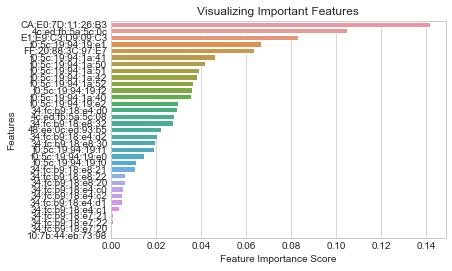

In [29]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - RF Classification Model

In [34]:
def compute_RF_Classification(flag=0,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,
                              n_estimators_parameter = 100, criterion_parameter = 'gini',
                              max_depth_parameter = None,min_samples_split_parameter = 2,
                              min_samples_leaf_parameter = 1,max_features_parameter = 'auto',
                              bootstrap_parameter = True, random_state_parameter = 42):
    # Init the RF Classification Estimator with the hyperparameters
    random_forest_estimator = RandomForestClassifier(n_estimators=n_estimators_parameter,criterion=criterion_parameter,
                                                    max_features=max_features_parameter,max_depth=max_depth_parameter,
                                                    min_samples_leaf=min_samples_leaf_parameter,min_samples_split=min_samples_split_parameter,
                                                    bootstrap=bootstrap_parameter,random_state=random_state_parameter)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,random_forest_estimator)
    else:
        # Use SKLearn RF Classification Default Estimator
        main_estimator = random_forest_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        # Compute Classification performance metrics
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        # Compute Classification performance metrics
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

### Experiments

#### Check Training model with no cross validation
Use RF Classifier to check the results on the training data alone

Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 450]]


precision  recall  f1-score  support
0                   1.0     1.0       1.0    150.0
1                   1.0     1.0       1.0    150.0
2                   1.0     1.0       1.0    450.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    750.0
weighted avg        1.0     1.0       1.0    750.0

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

Confusion Matrix:
[[144   0   6]
 [  0 147   3]
 [  4   5 441]]


precision    recall  f1-score  support
0              0.972973  0.960000  0.966443  150.000
1              0.967105  0.980000  0.973510  150.000
2              0.980000  0.980000  0.980000  450.000
accuracy       0.976000  0.976000  0.976000    0.976
macro avg      0.973359  0.973333  0.973318  750.000
weighted avg   0.976016  0.976000  0.975991  750.000

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 450]]


precision  recall  f1-score  support
0                   1.0     1.0       1.0    150.0
1                   1.0     1.0       1.0    150.0
2                   1.0     1.0       1.0    450.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    750.0
weighted avg        1.0     1.0       1.0    750.0

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

mae    mse      rmse  precision  accuracy  f1-score  type
0  0.000  0.000  0.000000   1.000000     1.000   1.00000  WiFi
2  0.000  0.000  0.000000   1.000000     1.000   1.00000  Both
1  0.024  0.024  0.154919   0.974242     0.976   0.97421   BLE

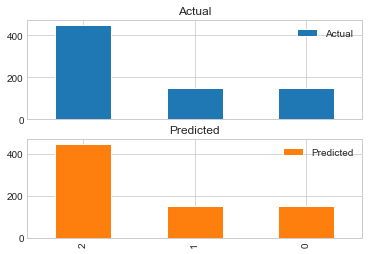

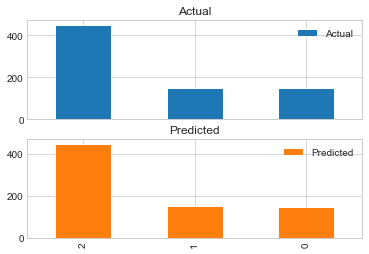

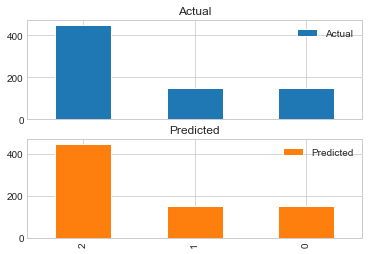

In [35]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_RF_Classification(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

#### Experiment - RF with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

mae       mse      rmse  precision  accuracy  f1-score  folds  type
24  0.048000  0.048000  0.219089   0.946653  0.952000  0.948723      8  Both
25  0.057333  0.057333  0.239444   0.937076  0.942667  0.939313      9  Both
26  0.064000  0.064000  0.252982   0.932390  0.936000  0.932063     10  Both
23  0.065333  0.065333  0.255604   0.930235  0.934667  0.929781      7  Both
22  0.085333  0.085333  0.292119   0.909620  0.914667  0.908295      6  Both
7   0.090667  0.090667  0.301109   0.899496  0.909333  0.903827      9  WiFi
6   0.108000  0.108000  0.328634   0.881032  0.892000  0.885431      8  WiFi
5   0.106667  0.106667  0.326599   0.885831  0.893333  0.884510      7  WiFi
8   0.112000  0.112000  0.334664   0.878931  0.888000  0.881297     10  WiFi
4   0.144000  0.144000  0.379473   0.844724  0.856000  0.847471      6  WiFi
20  0.225333  0.225333  0.474693   0.794939  0.774667  0.737368      4  Both
2   0.301333  0.301333  0.548938   0.678169  0.698667  0.659879      4  WiFi
13  0.313333  0.313333  0.559762   0.663067  0.686667  0.656952      6   BLE
17  0.317333  0.317333  0.563323   0.656283  0.682667  0.653971     10   BLE
15  0.334667  0.334667  0.578504   0.641406  0.665333  0.640194      8   BLE
16  0.360000  0.360000  0.600000   0.611262  0.640000  0.615185      9   BLE
14  0.382667  0.382667  0.618601   0.590898  0.617333  0.597664      7   BLE
19  0.398667  0.398667  0.631401   0.577001  0.601333  0.546674      3  Both
11  0.397333  0.397333  0.630344   0.568406  0.602667  0.543386      4   BLE
1   0.429333  0.429333  0.655235   0.539404  0.570667  0.528653      3  WiFi
0   0.380000  0.380000  0.616441   0.578749  0.620000  0.519759      2  WiFi
18  0.409333  0.409333  0.639792   0.539225  0.590667  0.472176      2  Both
10  0.533333  0.533333  0.730297   0.419287  0.466667  0.416869      3   BLE
9   0.476000  0.476000  0.689928   0.445802  0.524000  0.410478      2   BLE
12  0.485333  0.485333  0.696659   0.402606  0.514667  0.398703      5   BLE
21  0.438667  0.438667  0.662319   0.292264  0.561333  0.328211      5  Both
3   0.476000  0.476000  0.689928   0.272200  0.524000  0.310476      5  WiFi

Number of Folds:  8


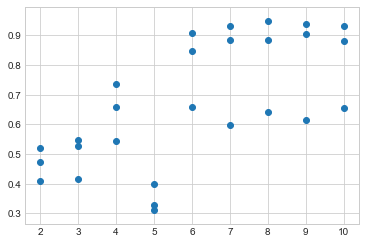

In [36]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

#### Experiment - RF with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

mae       mse      rmse  precision  accuracy  f1-score  test_size  \
21  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848        0.4   
22  0.018667  0.018667  0.136626   0.984884  0.981333  0.979714        0.5   
20  0.022222  0.022222  0.149071   0.981013  0.977778  0.975907        0.3   
0   0.026667  0.026667  0.163299   0.972423  0.973333  0.971339        0.1   
18  0.026667  0.026667  0.163299   0.972423  0.973333  0.971339        0.1   
19  0.026667  0.026667  0.163299   0.976236  0.973333  0.971148        0.2   
23  0.026667  0.026667  0.163299   0.979890  0.973333  0.971001        0.6   
1   0.026667  0.026667  0.163299   0.981844  0.973333  0.970297        0.2   
24  0.032381  0.032381  0.179947   0.976399  0.967619  0.964646        0.7   
4   0.037333  0.037333  0.193218   0.969916  0.962667  0.959223        0.5   
2   0.040000  0.040000  0.200000   0.968947  0.960000  0.956222        0.3   
3   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214        0.4   
25  0.051667  0.051667  0.227303   0.962431  0.948333  0.942718        0.8   
5   0.051111  0.051111  0.226078   0.958263  0.948889  0.942015        0.6   
6   0.057143  0.057143  0.239046   0.956826  0.942857  0.936966        0.7   
7   0.073333  0.073333  0.270801   0.945430  0.926667  0.918192        0.8   
26  0.096296  0.096296  0.310316   0.935497  0.903704  0.890544        0.9   
8   0.131852  0.131852  0.363114   0.895354  0.868148  0.845713        0.9   
9   0.173333  0.173333  0.416333   0.812172  0.826667  0.815228        0.1   
12  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823        0.4   
10  0.226667  0.226667  0.476095   0.757197  0.773333  0.761016        0.2   
11  0.217778  0.217778  0.466667   0.771502  0.782222  0.760032        0.3   
13  0.224000  0.224000  0.473286   0.762111  0.776000  0.755133        0.5   
14  0.233333  0.233333  0.483046   0.749094  0.766667  0.747493        0.6   
15  0.236190  0.236190  0.485994   0.743875  0.763810  0.744846        0.7   
16  0.231667  0.231667  0.481318   0.757495  0.768333  0.741832        0.8   
17  0.238519  0.238519  0.488384   0.773382  0.761481  0.715252        0.9   

    type  
21  Both  
22  Both  
20  Both  
0   WiFi  
18  Both  
19  Both  
23  Both  
1   WiFi  
24  Both  
4   WiFi  
2   WiFi  
3   WiFi  
25  Both  
5   WiFi  
6   WiFi  
7   WiFi  
26  Both  
8   WiFi  
9    BLE  
12   BLE  
10   BLE  
11   BLE  
13   BLE  
14   BLE  
15   BLE  
16   BLE  
17   BLE

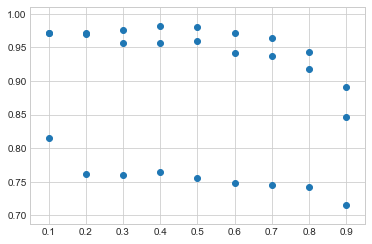

In [37]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

#### Experiment - RF with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [38]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

mae  mse  rmse  precision  accuracy  f1-score  type
0  1.0  1.0   1.0        0.0       0.0       0.0  WiFi
1  1.0  1.0   1.0        0.0       0.0       0.0   BLE
2  1.0  1.0   1.0        0.0       0.0       0.0  Both

#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using RF

mae       mse      rmse  precision  accuracy  f1-score  \
7  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
1  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
8  0.048000  0.048000  0.219089   0.946653  0.952000  0.948723   
2  0.108000  0.108000  0.328634   0.881032  0.892000  0.885431   
4  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823   
5  0.334667  0.334667  0.578504   0.641406  0.665333  0.640194   
0  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   
3  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   
6  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   

              method  type  
7            HoldOut  Both  
1            HoldOut  WiFi  
8  Stratified K-Fold  Both  
2  Stratified K-Fold  WiFi  
4            HoldOut   BLE  
5  Stratified K-Fold   BLE  
0                LOO  WiFi  
3                LOO   BLE  
6                LOO  Both

Selected cross validation method:  HoldOut


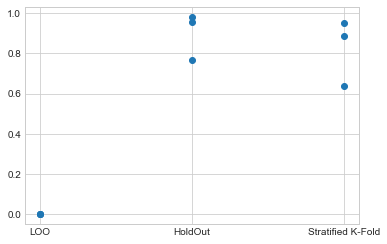

In [39]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
    holdout = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = "HoldOut"
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

mae       mse      rmse  precision  accuracy  f1-score  \
8   0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
9   0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
10  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
11  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
0   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
1   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
2   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
3   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
4   0.210000  0.210000  0.458258   0.789606  0.790000  0.764823   
5   0.213333  0.213333  0.461880   0.785106  0.786667  0.761772   
6   0.213333  0.213333  0.461880   0.785106  0.786667  0.761772   
7   0.213333  0.213333  0.461880   0.785106  0.786667  0.761772   

     preprocessing                                  preprocessingFunc  type  
8   StandardScaler  StandardScaler(copy=True, with_mean=True, with...  Both  
9     MaxAbsScaler                            MaxAbsScaler(copy=True)  Both  
10    MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))  Both  
11            None                                               None  Both  
0   StandardScaler  StandardScaler(copy=True, with_mean=True, with...  WiFi  
1     MaxAbsScaler                            MaxAbsScaler(copy=True)  WiFi  
2     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))  WiFi  
3             None                                               None  WiFi  
4   StandardScaler  StandardScaler(copy=True, with_mean=True, with...   BLE  
5     MaxAbsScaler                            MaxAbsScaler(copy=True)   BLE  
6     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))   BLE  
7             None                                               None   BLE

Selected Preprocessing:  StandardScaler


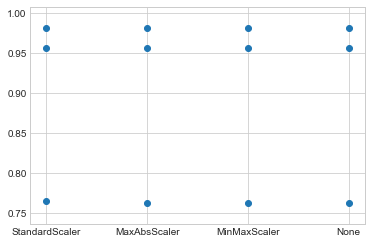

In [40]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the RF function with the different number of decision trees

mae       mse      rmse  precision  accuracy  f1-score  n_estimator  \
25  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848          100   
34  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137         1800   
26  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137          200   
27  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137          400   
28  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137          600   
29  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137          800   
30  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137         1000   
31  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137         1200   
32  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137         1400   
33  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137         1600   
35  0.020000  0.020000  0.141421   0.983347  0.980000  0.978137         2000   
10  0.036667  0.036667  0.191485   0.972194  0.963333  0.959916         1800   
9   0.036667  0.036667  0.191485   0.972194  0.963333  0.959916         1600   
5   0.036667  0.036667  0.191485   0.972194  0.963333  0.959916          800   
4   0.036667  0.036667  0.191485   0.972194  0.963333  0.959916          600   
11  0.036667  0.036667  0.191485   0.972194  0.963333  0.959916         2000   
3   0.036667  0.036667  0.191485   0.972357  0.963333  0.959912          400   
2   0.036667  0.036667  0.191485   0.972357  0.963333  0.959912          200   
8   0.040000  0.040000  0.200000   0.970032  0.960000  0.956216         1400   
7   0.040000  0.040000  0.200000   0.970032  0.960000  0.956216         1200   
6   0.040000  0.040000  0.200000   0.970032  0.960000  0.956216         1000   
1   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214          100   
24  0.040000  0.040000  0.200000   0.969946  0.960000  0.956137           10   
0   0.063333  0.063333  0.251661   0.939886  0.936667  0.930992           10   
13  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823          100   
15  0.216667  0.216667  0.465475   0.780742  0.783333  0.758743          400   
14  0.216667  0.216667  0.465475   0.780742  0.783333  0.758743          200   
23  0.216667  0.216667  0.465475   0.781781  0.783333  0.757374         2000   
22  0.216667  0.216667  0.465475   0.781781  0.783333  0.757374         1800   
21  0.220000  0.220000  0.469042   0.777373  0.780000  0.754360         1600   
16  0.223333  0.223333  0.472582   0.773956  0.776667  0.749925          600   
20  0.226667  0.226667  0.476095   0.769640  0.773333  0.746949         1400   
19  0.226667  0.226667  0.476095   0.769640  0.773333  0.746949         1200   
18  0.226667  0.226667  0.476095   0.769640  0.773333  0.746949         1000   
17  0.230000  0.230000  0.479583   0.766131  0.770000  0.742476          800   
12  0.243333  0.243333  0.493288   0.740826  0.756667  0.737416           10   

    type  
25  Both  
34  Both  
26  Both  
27  Both  
28  Both  
29  Both  
30  Both  
31  Both  
32  Both  
33  Both  
35  Both  
10  WiFi  
9   WiFi  
5   WiFi  
4   WiFi  
11  WiFi  
3   WiFi  
2   WiFi  
8   WiFi  
7   WiFi  
6   WiFi  
1   WiFi  
24  Both  
0   WiFi  
13   BLE  
15   BLE  
14   BLE  
23   BLE  
22   BLE  
21   BLE  
16   BLE  
20   BLE  
19   BLE  
18   BLE  
17   BLE  
12   BLE

Selected Estimator Size:  100


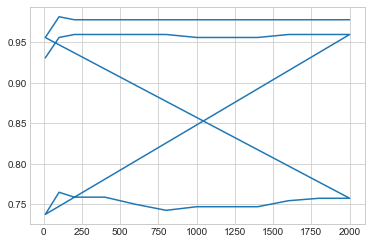

In [42]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','n_estimator','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for n in n_estimators:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                n_estimators_parameter=n)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 n_estimators_parameter=n)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), n_estimators_parameter=n)
        result.append(n)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['n_estimator'],statistics['f1-score'])
selected_estimator_size = statistics.sort_values(by=['f1-score'],ascending=False)['n_estimator'].head(1).values[0]
print("Selected Estimator Size: ",selected_estimator_size)

#### Experiment - Running the RF function with the different criterias

mae       mse      rmse  precision  accuracy  f1-score criterion  type
4  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848      gini  Both
5  0.026667  0.026667  0.163299   0.978865  0.973333  0.970963   entropy  Both
0  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214      gini  WiFi
1  0.046667  0.046667  0.216025   0.965759  0.953333  0.948709   entropy  WiFi
2  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823      gini   BLE
3  0.226667  0.226667  0.476095   0.767799  0.773333  0.746188   entropy   BLE

Selected Criterion:  gini


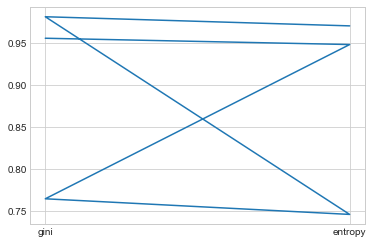

In [43]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','criterion','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for metric in criterion_metric:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                criterion_parameter=metric)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 criterion_parameter=metric)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), criterion_parameter=metric)
        result.append(metric)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['criterion'],statistics['f1-score'])
selected_criterion = statistics.sort_values(by=['f1-score'],ascending=False)['criterion'].head(1).values[0]
print("Selected Criterion: ",selected_criterion)

#### Experiment - Running the RF function with the different max_features

mae       mse      rmse  precision  accuracy  f1-score max_feature  \
6  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848        auto   
7  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848        sqrt   
8  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848        log2   
0  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214        auto   
1  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214        sqrt   
2  0.043333  0.043333  0.208167   0.967887  0.956667  0.952481        log2   
3  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823        auto   
4  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823        sqrt   
5  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823        log2   

   type  
6  Both  
7  Both  
8  Both  
0  WiFi  
1  WiFi  
2  WiFi  
3   BLE  
4   BLE  
5   BLE

Selected max_feature:  auto


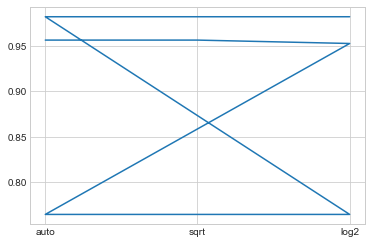

In [44]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','max_feature','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for max_feature in max_features:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                max_features_parameter=max_feature)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 max_features_parameter=max_feature)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), max_features_parameter=max_feature)
        result.append(max_feature)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['max_feature'],statistics['f1-score'])
selected_max_feature = statistics.sort_values(by=['f1-score'],ascending=False)['max_feature'].head(1).values[0]
print("Selected max_feature: ",selected_max_feature)

#### Experiment - Running the RF function with the different max_depth metric

mae       mse      rmse  precision  accuracy  f1-score  max_depth  \
35  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848        NaN   
34  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848      110.0   
26  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       30.0   
27  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       40.0   
28  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       50.0   
29  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       60.0   
30  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       70.0   
31  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       80.0   
32  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       90.0   
33  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848      100.0   
25  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848       20.0   
24  0.033333  0.033333  0.182574   0.974455  0.966667  0.963658       10.0   
10  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214      110.0   
9   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214      100.0   
8   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       90.0   
7   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       80.0   
6   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       70.0   
5   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       60.0   
1   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       20.0   
4   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       50.0   
3   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       40.0   
2   0.040000  0.040000  0.200000   0.970115  0.960000  0.956214       30.0   
11  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214        NaN   
0   0.053333  0.053333  0.230940   0.958323  0.946667  0.941421       10.0   
23  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823        NaN   
22  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823      110.0   
21  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823      100.0   
20  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       90.0   
19  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       80.0   
17  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       60.0   
16  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       50.0   
15  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       40.0   
14  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       30.0   
13  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       20.0   
18  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823       70.0   
12  0.206667  0.206667  0.454606   0.800193  0.793333  0.763466       10.0   

    type  
35  Both  
34  Both  
26  Both  
27  Both  
28  Both  
29  Both  
30  Both  
31  Both  
32  Both  
33  Both  
25  Both  
24  Both  
10  WiFi  
9   WiFi  
8   WiFi  
7   WiFi  
6   WiFi  
5   WiFi  
1   WiFi  
4   WiFi  
3   WiFi  
2   WiFi  
11  WiFi  
0   WiFi  
23   BLE  
22   BLE  
21   BLE  
20   BLE  
19   BLE  
17   BLE  
16   BLE  
15   BLE  
14   BLE  
13   BLE  
18   BLE  
12   BLE

Selected max_depth:  nan


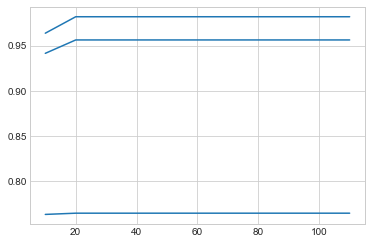

In [45]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','max_depth','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for depth in max_depth:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                max_depth_parameter=depth)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 max_depth_parameter=depth)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), max_depth_parameter=depth)
        result.append(depth)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['max_depth'],statistics['f1-score'])
selected_max_depth = statistics.sort_values(by=['f1-score'],ascending=False)['max_depth'].head(1).values[0]
print("Selected max_depth: ",selected_max_depth)

#### Experiment: Running the RF function with the different min_samples_split metric

mae       mse      rmse  precision  accuracy  f1-score  \
6  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
8  0.026667  0.026667  0.163299   0.978945  0.973333  0.971039   
7  0.036667  0.036667  0.191485   0.972277  0.963333  0.959954   
0  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
1  0.046667  0.046667  0.216025   0.962744  0.953333  0.948955   
2  0.066667  0.066667  0.258199   0.949653  0.933333  0.926152   
3  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823   
4  0.213333  0.213333  0.461880   0.784314  0.786667  0.759262   
5  0.216667  0.216667  0.465475   0.779483  0.783333  0.755711   

   min_samples_split  type  
6                  2  Both  
8                 10  Both  
7                  5  Both  
0                  2  WiFi  
1                  5  WiFi  
2                 10  WiFi  
3                  2   BLE  
4                  5   BLE  
5                 10   BLE

Selected min_samples_split:  2


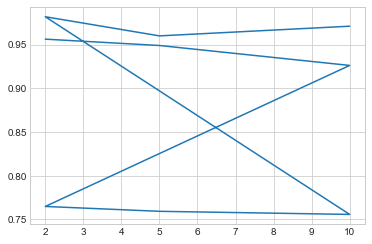

In [46]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','min_samples_split','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for s in min_samples_split:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                min_samples_split_parameter=s)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 min_samples_split_parameter=s)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), min_samples_split_parameter=s)
        result.append(s)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['min_samples_split'],statistics['f1-score'])
selected_min_samples_split = statistics.sort_values(by=['f1-score'],ascending=False)['min_samples_split'].head(1).values[0]
print("Selected min_samples_split: ",selected_min_samples_split)

#### Experiment: Running the RF function with the different min_samples_leaf metric

mae       mse      rmse  precision  accuracy  f1-score  \
6  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848   
7  0.026667  0.026667  0.163299   0.978865  0.973333  0.970963   
8  0.036667  0.036667  0.191485   0.972277  0.963333  0.959954   
0  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214   
1  0.056667  0.056667  0.238048   0.956385  0.943333  0.937525   
2  0.070000  0.070000  0.264575   0.944802  0.930000  0.920959   
4  0.203333  0.203333  0.450925   0.795995  0.796667  0.769008   
3  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823   
5  0.210000  0.210000  0.458258   0.791914  0.790000  0.761595   

   min_samples_leaf  type  
6                 1  Both  
7                 2  Both  
8                 4  Both  
0                 1  WiFi  
1                 2  WiFi  
2                 4  WiFi  
4                 2   BLE  
3                 1   BLE  
5                 4   BLE

Selected min_samples_leaf:  1


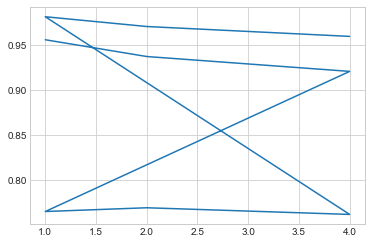

In [47]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','min_samples_leaf','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for leaf in min_samples_leaf:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                                min_samples_leaf_parameter=leaf)  
        elif selected_method =='Stratified K-Fold':
            result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                 min_samples_leaf_parameter=leaf)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4,
                                                                                        random_state = 42,stratify=train_Y)
            result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(), min_samples_leaf_parameter=leaf)
        result.append(leaf)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['min_samples_leaf'],statistics['f1-score'])
selected_min_samples_leaf = statistics.sort_values(by=['f1-score'],ascending=False)['min_samples_leaf'].head(1).values[0]
print("Selected min_samples_leaf: ",selected_min_samples_leaf)

#### Run RandomizedSearchCV for parameter tunning

In [48]:
types = ['WiFi','BLE','Both']
results = list()
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('standardizer', StandardScaler()), ('rf', RandomForestClassifier())])
        clf = RandomizedSearchCV(pipe,param_distributions  = random_grid,n_iter=100,cv=selected_fold,scoring=score,verbose=1,n_jobs=-1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  8.9min finished


Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  9.1min finished


Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 11.0min finished


rf__n_estimators  rf__min_samples_split  rf__min_samples_leaf  \
2               400                      2                     1   
0              1400                      5                     1   
1               600                     10                     1   

  rf__max_features  rf__max_depth rf__criterion  rf__bootstrap     score  \
2             sqrt             20          gini          False  f1_macro   
0             sqrt            100          gini          False  f1_macro   
1             log2             70       entropy          False  f1_macro   

   best_score  type  
2    0.965840  Both  
0    0.907516  WiFi  
1    0.643068   BLE

### Best Parameters
Display the best parameters tunned throughout the experiments

In [52]:
selected_max_depth = 110.0
conclusion_cols=['Cross_Validation','Number of Estimators','Max Features','Max Depth','Criterion','Min_Samples_Leaf','Min_Samples_Split','Preprocessing']
conclusion_list = [selected_method,selected_estimator_size,selected_max_feature,selected_max_depth,selected_criterion,
                   selected_min_samples_leaf,selected_min_samples_split,selected_preprocessing]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

Cross_Validation  Number of Estimators Max Features  Max Depth Criterion  \
0          HoldOut                   100         auto      110.0      gini   

   Min_Samples_Leaf  Min_Samples_Split   Preprocessing  
0                 1                  2  StandardScaler

### Best Results

In [53]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited,
                            n_estimators_parameter=selected_estimator_size,criterion_parameter=selected_criterion,
                                          max_depth_parameter=selected_max_depth, max_features_parameter=selected_max_feature,
                                          min_samples_leaf_parameter=selected_min_samples_leaf,
                                          min_samples_split_parameter=selected_min_samples_split)
    elif selected_method =='Stratified K-Fold':
        result = compute_RF_Classification(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold,
                            n_estimators_parameter=selected_estimator_size,criterion_parameter=selected_criterion,
                                          max_depth_parameter=selected_max_depth, max_features_parameter=selected_max_feature,
                                          min_samples_leaf_parameter=selected_min_samples_leaf,
                                          min_samples_split_parameter=selected_min_samples_split)
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
        result = compute_RF_Classification(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),n_estimators_parameter=selected_estimator_size,criterion_parameter=selected_criterion,
                                          max_depth_parameter=selected_max_depth, max_features_parameter=selected_max_feature,
                                          min_samples_leaf_parameter=selected_min_samples_leaf,
                                          min_samples_split_parameter=selected_min_samples_split)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

mae       mse      rmse  precision  accuracy  f1-score  type
2  0.016667  0.016667  0.129099   0.988514  0.983333  0.981848  Both
0  0.040000  0.040000  0.200000   0.970115  0.960000  0.956214  WiFi
1  0.210000  0.210000  0.458258   0.789606  0.790000  0.764823   BLE